In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.math import exp

import matplotlib.pyplot as plt
import numpy as np

In [180]:
!if ! ls /tmp/FOX_train.h5; \
    wget https://repo.gorchilov.net/datasets/fox-multi-factor.tar.gz -O /tmp/fox.tar.gz; \
    tar -xf /tmp/fox.tar.gz -C /tmp; \
    end

import h5py

train = h5py.File('/tmp/FOX_train.h5', mode='r')
test = h5py.File('/tmp/FOX_test.h5', mode='r')

/tmp/FOX_train.h5


In [3]:
train_X = train['data'][:]
train_y = train['labels'][:]

test_X = test['data'][:]
test_y = test['labels'][:]

In [34]:
clear_session()
model = Sequential([
    LSTM(8, input_shape=(4, 1000)),
    Dense(128, activation='relu'),
    Dense(31, activation='relu')
])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 32288     
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 31)                3999      
Total params: 37,439
Trainable params: 37,439
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer=Adam(lr=0.00001), loss='mse')
history = model.fit(train_X[:1000], train_y[:1000], epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354528.0000
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354528.0000
Epoch 3/1000
32/32 [==============================] - 0s 6ms/step - loss: 220354528.0000
Epoch 4/1000
32/32 [==============================] - 0s 6ms/step - loss: 220354528.0000
Epoch 5/1000
32/32 [==============================] - 0s 5ms/step - loss: 220354544.0000
Epoch 6/1000
32/32 [==============================] - 0s 5ms/step - loss: 220354512.0000
Epoch 7/1000
32/32 [==============================] - 0s 5ms/step - loss: 220354496.0000
Epoch 8/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354544.0000
Epoch 9/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354496.0000
Epoch 10/1000
32/32 [==============================] - 0s 5ms/step - loss: 220354528.0000
Epoch 11/1000
32/32 [==============================] - 0s 7ms/step - loss: 220354544.0000
Epoch 12/1000
32/32

32/32 [==============================] - 0s 4ms/step - loss: 220354304.0000
Epoch 93/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354304.0000
Epoch 94/1000
32/32 [==============================] - 0s 3ms/step - loss: 220354336.0000
Epoch 95/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354336.0000
Epoch 96/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354288.0000
Epoch 97/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354320.0000
Epoch 98/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354320.0000
Epoch 99/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354304.0000
Epoch 100/1000
32/32 [==============================] - 0s 4ms/step - loss: 220354320.0000
Epoch 101/1000
32/32 [==============================] - 0s 3ms/step - loss: 220354304.0000
Epoch 102/1000
32/32 [==============================] - 0s 5ms/step - loss: 220354304.0000
Epoch 103/1000
32/32 

32/32 [==============================] - 0s 4ms/step - loss: 220353888.0000
Epoch 273/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353904.0000
Epoch 274/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353888.0000
Epoch 275/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353856.0000
Epoch 276/1000
32/32 [==============================] - 0s 5ms/step - loss: 220353840.0000
Epoch 277/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353888.0000
Epoch 278/1000
32/32 [==============================] - 0s 3ms/step - loss: 220353904.0000
Epoch 279/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353904.0000
Epoch 280/1000
32/32 [==============================] - 0s 5ms/step - loss: 220353888.0000
Epoch 281/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353872.0000
Epoch 282/1000
32/32 [==============================] - 0s 5ms/step - loss: 220353808.0000
Epoch 283/1000

32/32 [==============================] - 0s 4ms/step - loss: 220353488.0000
Epoch 453/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353440.0000
Epoch 454/1000
32/32 [==============================] - 0s 3ms/step - loss: 220353424.0000
Epoch 455/1000
32/32 [==============================] - 0s 3ms/step - loss: 220353456.0000
Epoch 456/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353440.0000
Epoch 457/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353408.0000
Epoch 458/1000
32/32 [==============================] - 0s 3ms/step - loss: 220353408.0000
Epoch 459/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353440.0000
Epoch 460/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353440.0000
Epoch 461/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353424.0000
Epoch 462/1000
32/32 [==============================] - 0s 4ms/step - loss: 220353408.0000
Epoch 463/1000

32/32 [==============================] - 0s 4ms/step - loss: 220352928.0000
Epoch 633/1000
32/32 [==============================] - 0s 4ms/step - loss: 220352944.0000
Epoch 634/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352880.0000
Epoch 635/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352944.0000
Epoch 636/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352912.0000
Epoch 637/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352912.0000
Epoch 638/1000
32/32 [==============================] - 0s 4ms/step - loss: 220352928.0000
Epoch 639/1000
32/32 [==============================] - 0s 4ms/step - loss: 220352928.0000
Epoch 640/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352864.0000
Epoch 641/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352896.0000
Epoch 642/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352928.0000
Epoch 643/1000

32/32 [==============================] - 0s 4ms/step - loss: 220352272.0000
Epoch 813/1000
32/32 [==============================] - 0s 6ms/step - loss: 220352288.0000
Epoch 814/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352240.0000
Epoch 815/1000
32/32 [==============================] - 0s 4ms/step - loss: 220352224.0000
Epoch 816/1000
32/32 [==============================] - 0s 5ms/step - loss: 220352240.0000
Epoch 817/1000
32/32 [==============================] - 0s 4ms/step - loss: 220352224.0000
Epoch 818/1000
32/32 [==============================] - 0s 5ms/step - loss: 220352240.0000
Epoch 819/1000
32/32 [==============================] - 0s 5ms/step - loss: 220352224.0000
Epoch 820/1000
32/32 [==============================] - 0s 4ms/step - loss: 220352224.0000
Epoch 821/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352224.0000
Epoch 822/1000
32/32 [==============================] - 0s 3ms/step - loss: 220352240.0000
Epoch 823/1000

32/32 [==============================] - 0s 3ms/step - loss: 220351536.0000
Epoch 993/1000
32/32 [==============================] - 0s 4ms/step - loss: 220351536.0000
Epoch 994/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351472.0000
Epoch 995/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351536.0000
Epoch 996/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351568.0000
Epoch 997/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351536.0000
Epoch 998/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351520.0000
Epoch 999/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351504.0000
Epoch 1000/1000
32/32 [==============================] - 0s 3ms/step - loss: 220351536.0000


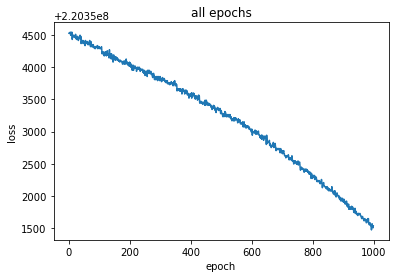

In [36]:
start = 0
end = 1000

plt.title('all epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(start, end), history.history['loss'][start:end])
plt.show()

In [ ]:
from numpy import expand_dims, ndarray
from math import isclose
from tensorflow.keras import Model


def eval_AUC(model, X: ndarray, y: ndarray, percent_split=1 / 5):
    accuracy = []
    for i in range(len(X)):
        sample = expand_dims(X[i], 0)
        pred = model.predict(sample).flatten()
        close = []
        for j in range(len(pred)):
            atol = y[i][j] * percent_split
            close.append(isclose(pred[j], y[i][j], abs_tol=atol))
        accuracy.append(max(set(close), key=close.count))
    return accuracy